In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

In [12]:
# Twitter API credentials

auth = tweepy.OAuthHandler( consumer_key , consumer_key_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

print(api)

In [13]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])

# df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date())
# df['date'] = pd.to_datetime(df['date'])
# df.dtypes
# df['date'] = df['date'].dt.tz_localize(None)
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [14]:
def get_tweets(screen_name, count):
    i = 0
    
    # get all tweets and retweets from user timeline containing keyword "imran khan"
    for tweet in tweepy.Cursor(api.user_timeline, screen_name=screen_name, tweet_mode="extended", lang='en').items():
        if "imran khan" in tweet.full_text.lower() or "imrankhan" in tweet.full_text.lower():
            date = tweet.created_at
            df.loc[i, "Date"] = date.strftime("%Y-%m-%d")
            df.loc[i, "User"] = tweet.user.name
            df.loc[i, "IsVerified"] = tweet.user.verified
            df.loc[i, "Tweet"] = tweet.full_text
            df.loc[i, "Likes"] = tweet.favorite_count
            df.loc[i, "RT"] = tweet.retweet_count
            df.loc[i, "User_location"] = tweet.user.location
            
            df.to_excel('{}.xlsx'.format("TweetDataset"), index=False)  # Save as Excel
            
            i += 1
            if i > count:
                break
    
    return df

screen_name = "ARYNEWSOFFICIAL"
count = 200

get_tweets(screen_name, count)


Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
U

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2023-05-04,ARY NEWS,False,Imran Khan says ‘told court about people who w...,73,13,Pakistan
1,2023-05-04,ARY NEWS,False,عمران خان کی جان کو درپیش خدشات۔۔ ن لیگی رہنما...,104,24,Pakistan
2,2023-05-04,ARY NEWS,False,RT @arynewsud: جن سے جان کا خطرہ ہے ان کے نام ...,0,113,Pakistan
3,2023-05-04,ARY NEWS,False,‘#ImranKhan divorced #RehamKhan on #BushraBibi...,46,8,Pakistan
4,2023-05-04,ARY NEWS,False,"Imran Khan says wants good relations with US, ...",76,7,Pakistan
...,...,...,...,...,...,...,...
196,2023-04-01,ARY NEWS,False,SOME JUDGES WANT TO PROVIDE RELIEF TO IMRAN KH...,39,6,Pakistan
197,2023-04-01,ARY NEWS,False,Imran Khan says was pressurised by Qamar Bajwa...,567,60,Pakistan
198,2023-04-01,ARY NEWS,False,#ImranKhan files contempt plea against #PEMRA ...,797,155,Pakistan
199,2023-04-01,ARY NEWS,False,لاہور ہائیکورٹ، عمران خان کو ٹی وی چینلز پر نش...,938,195,Pakistan


In [15]:
# Showing the data the Data
df.head(10)     

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2023-05-04,ARY NEWS,False,Imran Khan says ‘told court about people who w...,73,13,Pakistan
1,2023-05-04,ARY NEWS,False,عمران خان کی جان کو درپیش خدشات۔۔ ن لیگی رہنما...,104,24,Pakistan
2,2023-05-04,ARY NEWS,False,RT @arynewsud: جن سے جان کا خطرہ ہے ان کے نام ...,0,113,Pakistan
3,2023-05-04,ARY NEWS,False,‘#ImranKhan divorced #RehamKhan on #BushraBibi...,46,8,Pakistan
4,2023-05-04,ARY NEWS,False,"Imran Khan says wants good relations with US, ...",76,7,Pakistan
5,2023-05-04,ARY NEWS,False,Imran Khan gets extension in interim bail in n...,228,31,Pakistan
6,2023-05-04,ARY NEWS,False,IHC reserves verdict on Imran Khan’s bail plea...,77,16,Pakistan
7,2023-05-04,ARY NEWS,False,Imran Khan’s bail cancelation sought in terror...,53,6,Pakistan
8,2023-05-04,ARY NEWS,False,Imran Khan inside the IHC \n\n#ARYNews #PTI #I...,321,55,Pakistan
9,2023-05-04,ARY NEWS,False,عمران خان وہیل چیئر پر ہائیکورٹ کے اندر داخل ہ...,848,202,Pakistan


In [16]:
import nltk
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()



def clean_tweet(tweet):
    # tokenization
    tweet = word_tokenize(tweet)
    # lower case
    tweet = [word.lower() for word in tweet]
    tweet = [lemmatizer.lemmatize(word) for word in tweet]
    tweet = [word for word in tweet if word.isalpha()]
    tweet = " ".join(tweet)
    tweet = tweet.strip()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # remove http links
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"@\S+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = re.sub(r"\d+", "", tweet)
    # remove https and username and special characters
    tweet = ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = tweet.split()
    tweet = [word for word in tweet if word not in stopwords.words('english')]
    tweet = " ".join(tweet)
    tweet = PorterStemmer().stem(tweet)
    tweet = tweet.strip('https')
    tweet =tweet.split()
    tweet = [t for t in tweet if len(t) > 2]
    tweet = " ".join(tweet)
    
    
    return tweet

[nltk_data] Downloading package omw-1.4 to /home/bakar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))

df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2023-05-04,ARY NEWS,False,Imran Khan says ‘told court about people who w...,73,13,Pakistan,imran khan say told court people want killed a...
1,2023-05-04,ARY NEWS,False,عمران خان کی جان کو درپیش خدشات۔۔ ن لیگی رہنما...,104,24,Pakistan,arynews thereporters imrankhan pmln
2,2023-05-04,ARY NEWS,False,RT @arynewsud: جن سے جان کا خطرہ ہے ان کے نام ...,0,113,Pakistan,arynewsud arynewsurdu imrankhan
3,2023-05-04,ARY NEWS,False,‘#ImranKhan divorced #RehamKhan on #BushraBibi...,46,8,Pakistan,imrankhan divorced rehamkhan bushrabibi advice
4,2023-05-04,ARY NEWS,False,"Imran Khan says wants good relations with US, ...",76,7,Pakistan,imran khan say want good relation slavery arynews


In [18]:
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    # print analysis values
    if analysis.sentiment.polarity >=0 and analysis.sentiment.polarity <=0.3:
        some_positive = "some positive"
        return some_positive
    elif analysis.sentiment.polarity >=0.3 and analysis.sentiment.polarity <=0.6:
        positive = "positive"
        return positive
    elif analysis.sentiment.polarity >=0.6 and analysis.sentiment.polarity <=1:
        very_positive = "very positive"
        return very_positive
    elif analysis.sentiment.polarity >=-0.3 and analysis.sentiment.polarity <=0:
        some_negative = "some negative"
        return some_negative    
    elif analysis.sentiment.polarity >=-0.6 and analysis.sentiment.polarity <=-0.3:
        negative = "negative"
        return negative
    elif analysis.sentiment.polarity >=-1 and analysis.sentiment.polarity <=-0.6:
        very_negative = "very negative"
        return very_negative
    else:
        neutral = "neutral"
        return neutral

In [19]:
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(10)
# save df['sentiment'] to csv
df.to_excel('{}.xlsx'.format("Sentiment"),index=False)   ## Save as Excel

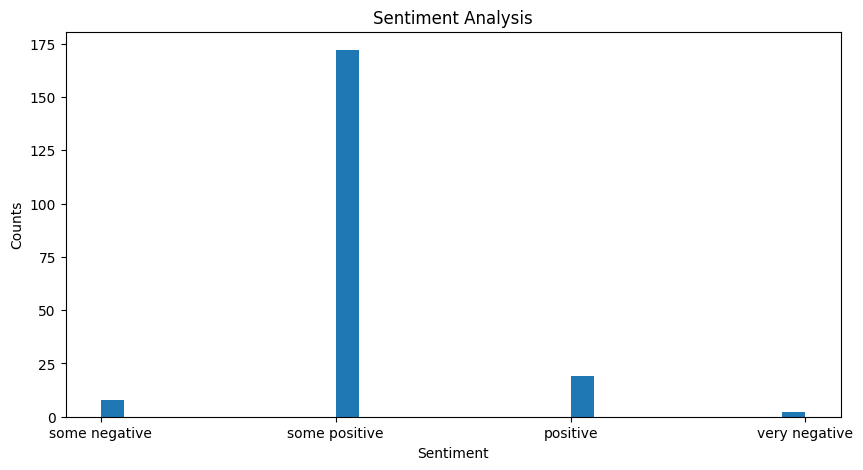

([<matplotlib.patches.Wedge at 0x7fa89df4e260>,
 [Text(-0.9889245761165955, 0.48169303789094997, 'some positive'),
  Text(0.9018883505241675, -0.6297597980093654, 'positive'),
  Text(1.080708824463502, -0.20510591587449672, 'some negative'),
  Text(1.0994626078114955, -0.034379849103008994, 'very negative')],
 [Text(-0.5394134051545065, 0.2627416570314272, '85.6%'),
  Text(0.4919391002859095, -0.34350534436874475, '9.5%'),
  Text(0.5894775406164555, -0.11187595411336183, '4.0%'),
  Text(0.5997068769880884, -0.01875264496527763, '1.0%')])

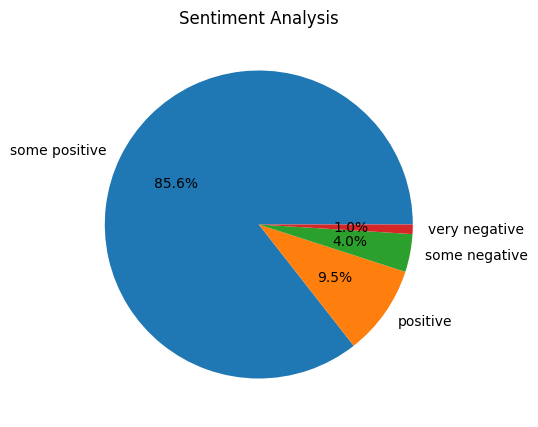

In [20]:
# print report of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
# plot graph of sentiment analysis with matplotlib
plt.hist(df['Sentiment'], bins=30)
plt.show()
# print pie chart of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].value_counts().index, autopct='%1.1f%%')